### Data Preperation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/ML dataset.csv")
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [ ]:
df = df.round(2)


In [ ]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
df['MINIMUM_PAYMENTS'].value_counts().head()

176.28    4
178.84    4
171.75    4
177.97    3
527.24    3
Name: MINIMUM_PAYMENTS, dtype: int64

In [ ]:
print("Mean: "+str(round(df['MINIMUM_PAYMENTS'].mean(), 2)))
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(round(df['MINIMUM_PAYMENTS'].mean(), 2))

Mean: 864.21


In [ ]:
df['CREDIT_LIMIT'].value_counts()

3000.00     784
1500.00     722
1200.00     621
1000.00     614
2500.00     612
           ... 
9200.00       1
13550.00      1
7227.27       1
11250.00      1
1833.33       1
Name: CREDIT_LIMIT, Length: 205, dtype: int64

In [ ]:
print("Mean: "+str(round(df['CREDIT_LIMIT'].mean(), 2)))
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(round(df['CREDIT_LIMIT'].mean(), 2))

Mean: 4494.45


In [ ]:
del df['CUST_ID']
df.shape

(8950, 17)

### Exploratory Data Analysis 

In [ ]:
import plotly.express as px

In [ ]:
px.pie(values=df['TENURE'].value_counts(), names=df['TENURE'].unique(), title='Tenure of customers')

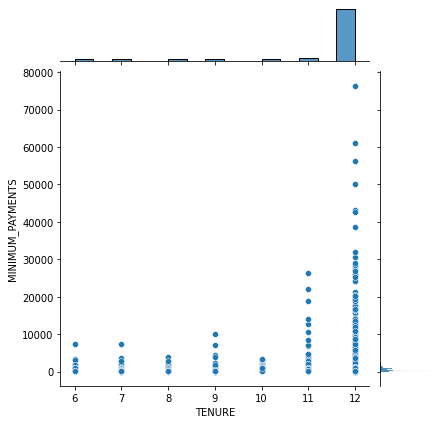

In [ ]:
sns.jointplot(x='TENURE', y='MINIMUM_PAYMENTS', data=df)

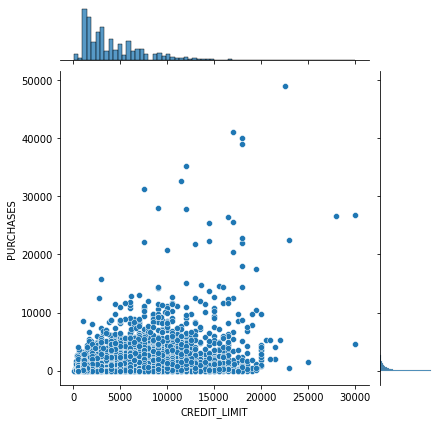

In [ ]:
sns.jointplot(x='CREDIT_LIMIT', y='PURCHASES', data=df)

<Figure size 864x360 with 0 Axes>

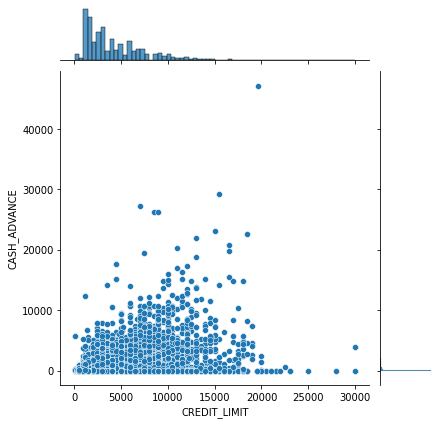

In [ ]:
plt.figure(figsize=(12,5))
sns.jointplot(x = "CREDIT_LIMIT", y = "CASH_ADVANCE", data=df)
# pairplot

In [ ]:
plt.figure(figsize=(10,5))
px.scatter(df, x='TENURE', y='CREDIT_LIMIT', color='TENURE')

<Figure size 720x360 with 0 Axes>

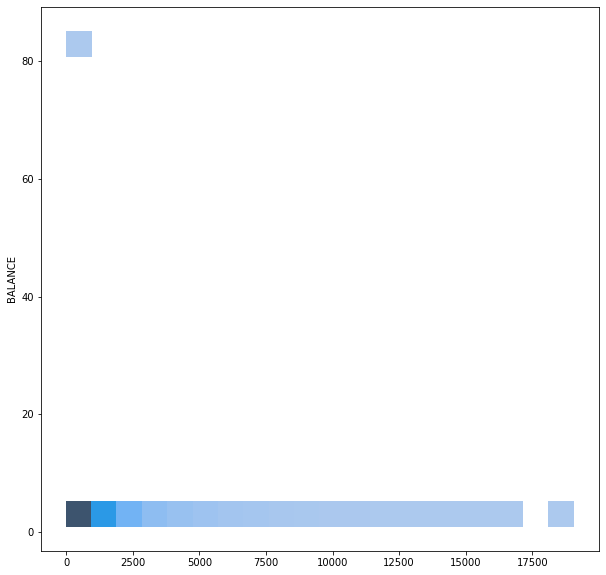

In [ ]:
plt.figure(figsize=(10,10))
sns.histplot(x=df['BALANCE'].unique(), y=df['BALANCE'].value_counts() , bins=20)

In [ ]:
df['TOTAL_TRX'] = df['PURCHASES_TRX'] + df['CASH_ADVANCE_TRX']
df['TOTAL_TRX'].describe()

count    8950.000000
mean       17.958659
std        25.338356
min         0.000000
25%         4.000000
50%        10.000000
75%        21.000000
max       358.000000
Name: TOTAL_TRX, dtype: float64

In [ ]:
df['TOTAL_TRX'].value_counts()

1      816
2      596
12     558
3      472
4      451
      ... 
125      1
168      1
232      1
144      1
186      1
Name: TOTAL_TRX, Length: 184, dtype: int64

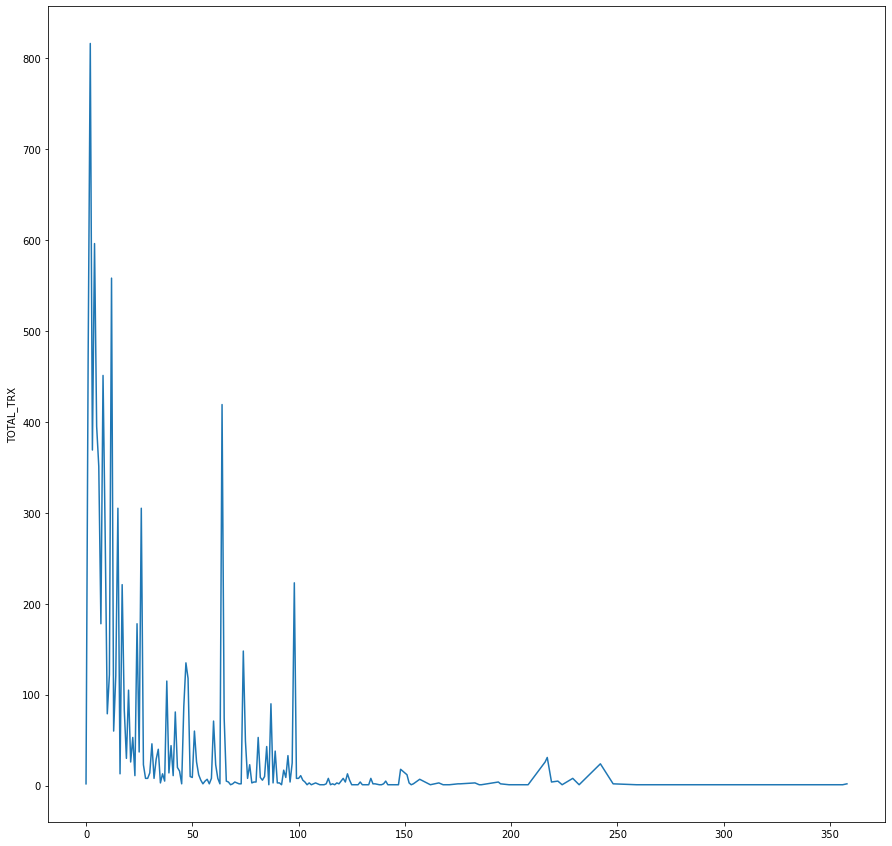

In [ ]:
plt.figure(figsize=(15, 15))
sns.lineplot(x=df['TOTAL_TRX'].unique(), y=df['TOTAL_TRX'].value_counts())

### Data Modelling 

In [ ]:
from sklearn.preprocessing import StandardScaler, normalize, MinMaxScaler, QuantileTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [ ]:
def plot(data):
    for i,j in zip(df.columns, range(len(df.columns))):
#         print("{} {}".format(i, j))

        plt.figure(figsize=(15,5))

        # 121 for 1 row, 2 columns, 1st position
        plt.subplot(121)
        sns.kdeplot(df[i])
        plt.title(i+' before scaling')

        # 122 for 1 row, 2 columns, 2nd position
        plt.subplot(122)
        sns.kdeplot(data[j])
        plt.title(i+' after scaling')

# Standard Scalar

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
print(scaled_data)

[[-0.73198974 -0.24214335 -0.42489974 ... -0.52466626  0.36067954
  -0.6298574 ]
 [ 0.78696211  0.13735402 -0.46955188 ...  0.22713151  0.36067954
  -0.55092127]
 [ 0.44713569  0.51685139 -0.10766823 ... -0.52466626  0.36067954
  -0.23517675]
 ...
 [-0.74039748 -0.19997698 -0.40196519 ...  0.32964939 -4.12276757
  -0.51145321]
 [-0.74517307 -0.19997698 -0.46955188 ...  0.32964939 -4.12276757
  -0.6298574 ]
 [-0.57257419 -0.87463897  0.04214581 ... -0.52466626 -4.12276757
   0.2779081 ]]


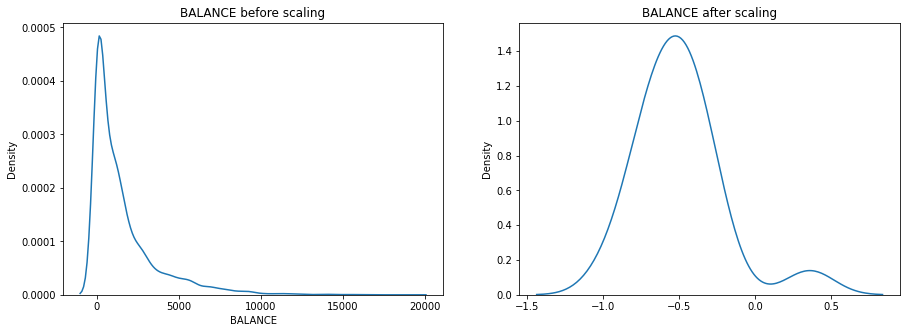

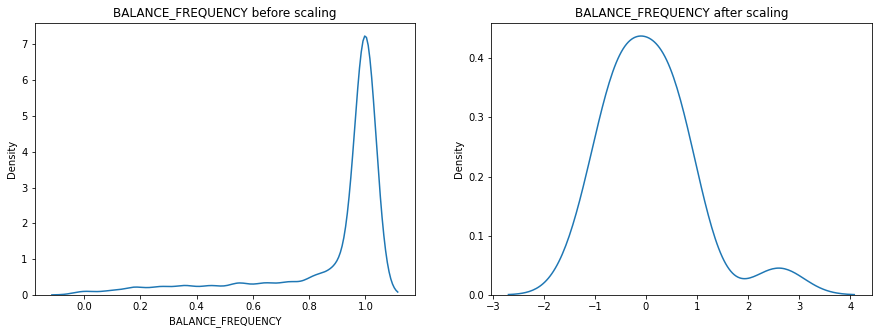

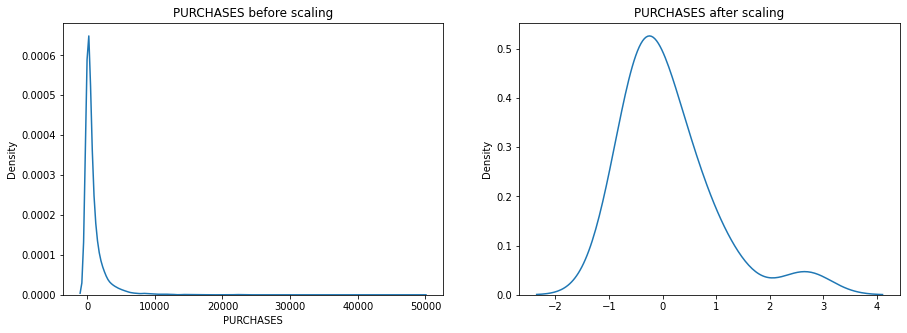

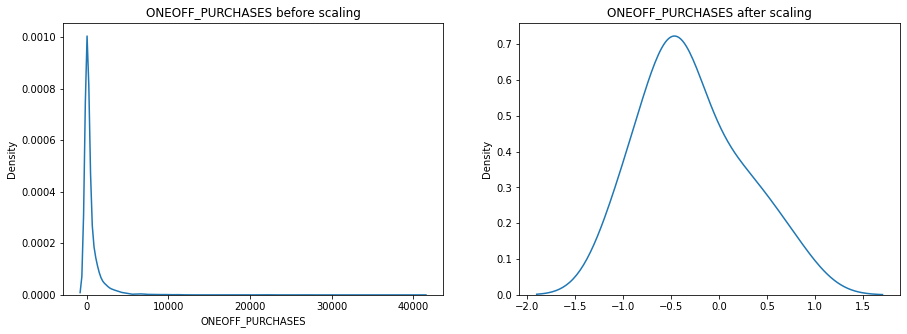

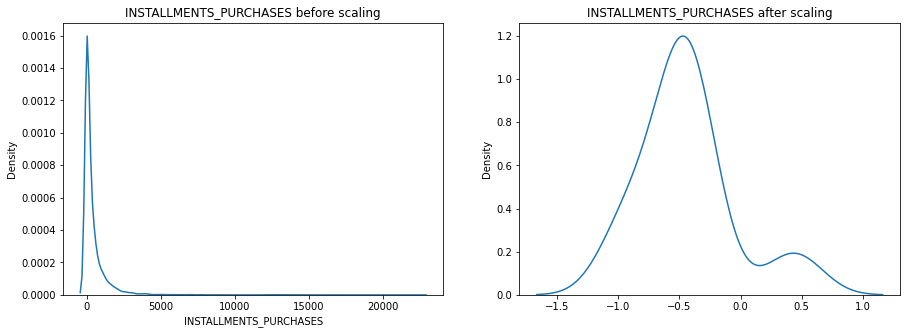

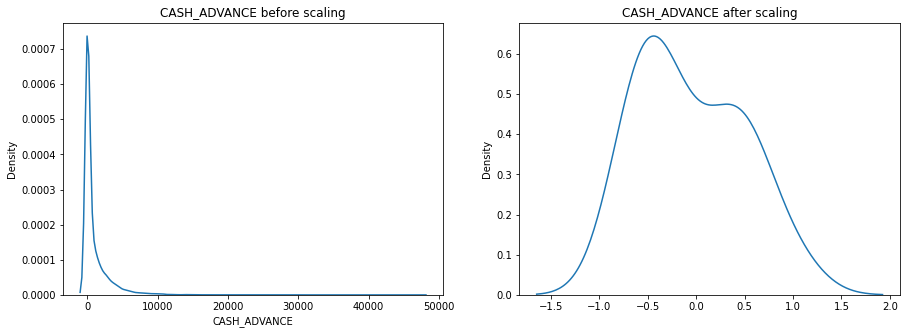

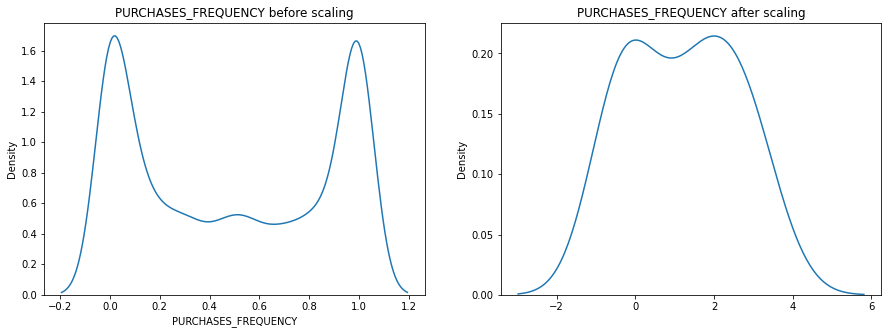

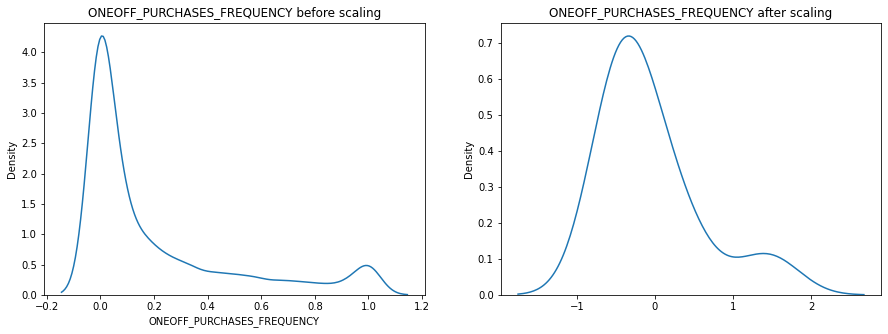

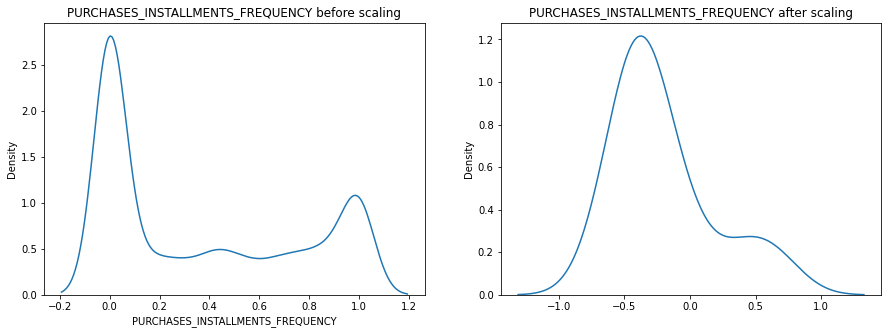

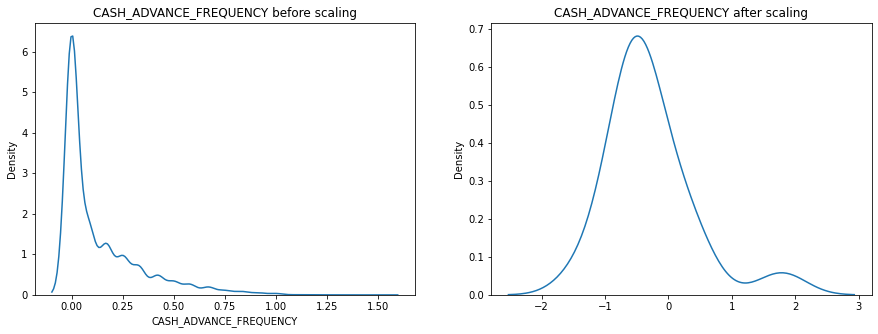

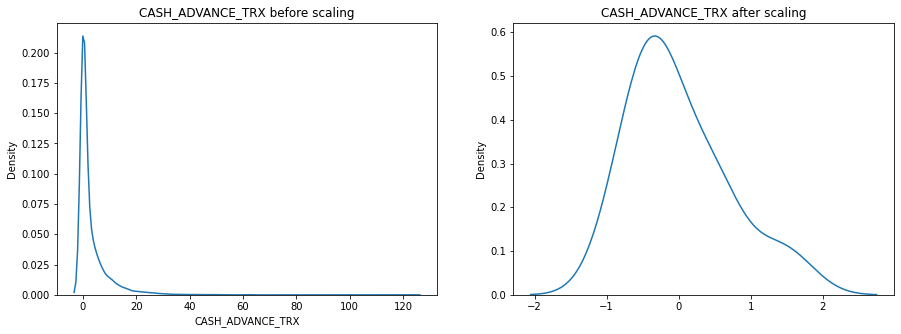

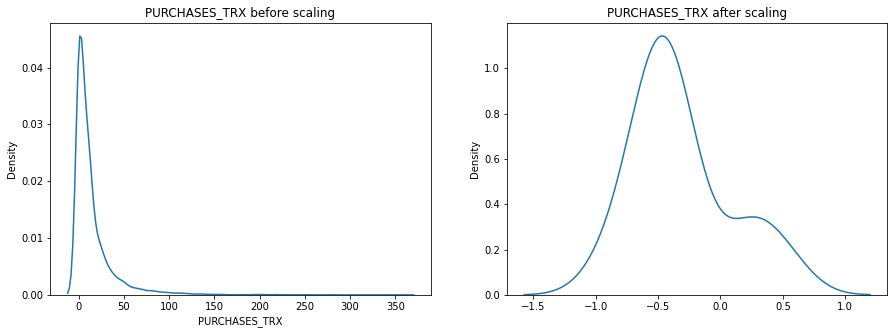

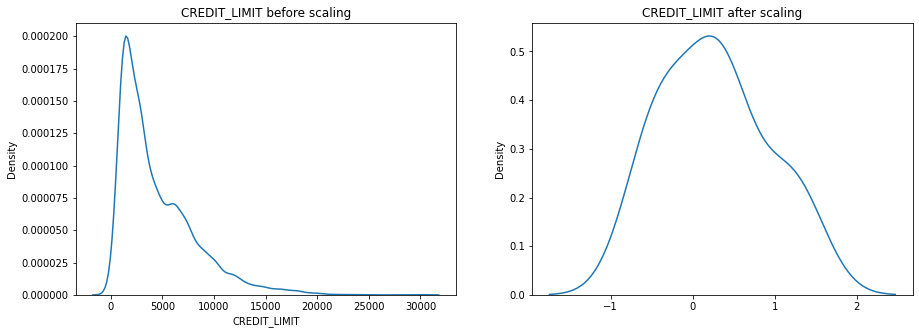

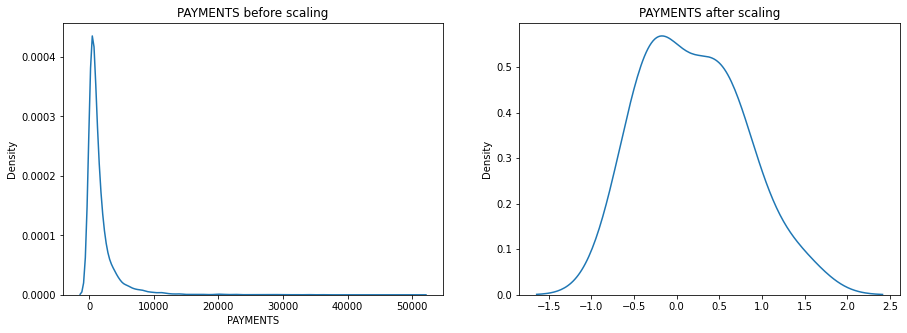

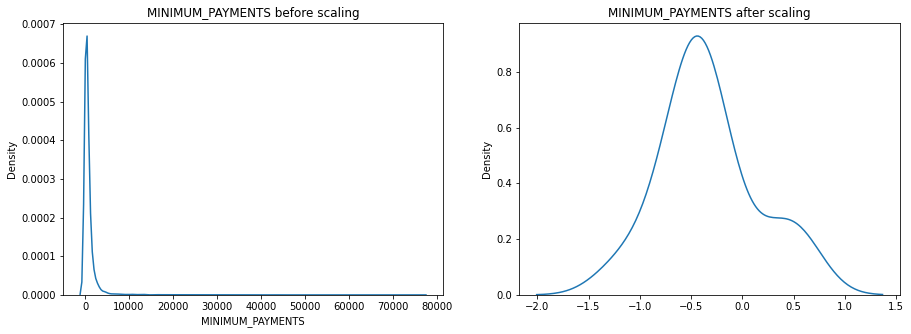

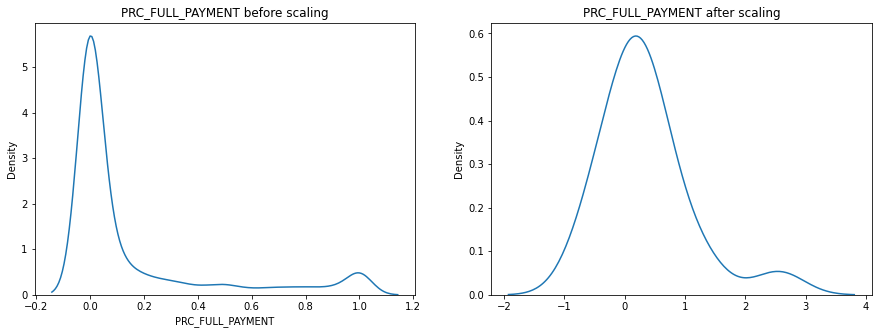

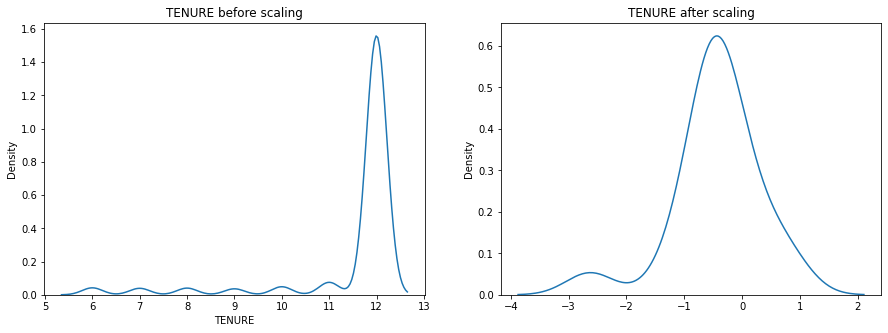

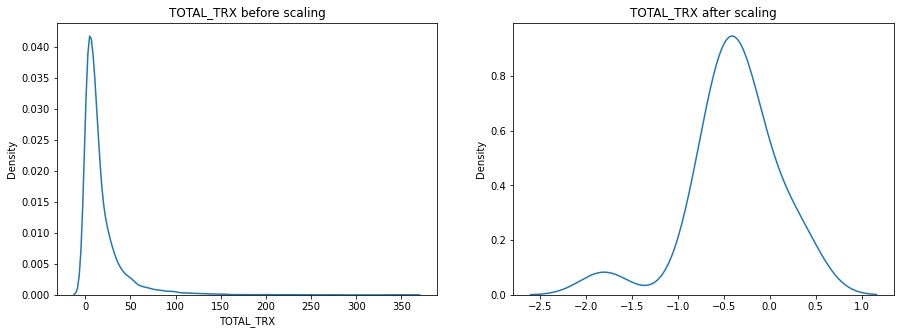

In [ ]:
plot(scaled_data)

In [ ]:
# Normalizing the Data 
normalized_df = normalize(scaled_data) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df)

In [ ]:
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(normalized_df) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
X_principal.head(5)

P1        P2
0 -0.539075 -0.628678
1 -0.495813  0.553640
2  0.327074  0.220721
3 -0.509246 -0.083780
4 -0.601358 -0.438864

In [ ]:
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.style as style
%matplotlib inline


Choosing the K value using elbow method 

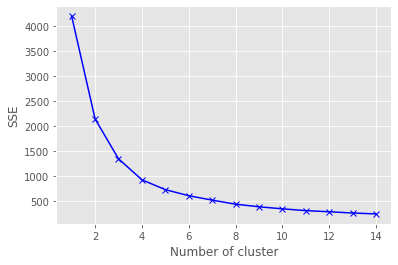

In [ ]:
style.use('ggplot')

# Choosing the K value using elbow method - NORMALIZED DATA 
sse = {}
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X_principal)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()),'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()
# K=4,5,6 

Silhouette Score


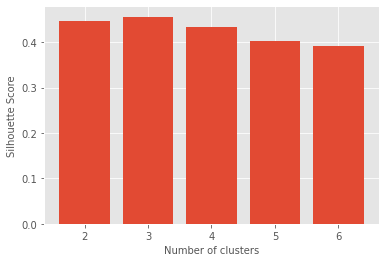

In [ ]:
# silhouette score
silhouette_scores = []

for n_cluster in range(2, 7):
    silhouette_scores.append( 
        silhouette_score(X_principal, KMeans(n_clusters = n_cluster).fit_predict(X_principal))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6] 

plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

# Min-Max Scaler

In [ ]:
norm = normalize(scaled_data)
norm

array([[-0.301571  , -0.09976016, -0.1750536 , ..., -0.21615621,
         0.14859565, -0.2594937 ],
       [ 0.2174211 ,  0.03794803, -0.12972732, ...,  0.06275166,
         0.09964818, -0.15220797],
       [ 0.12646105,  0.14617838, -0.03045124, ..., -0.14838862,
         0.10200911, -0.06651381],
       ...,
       [-0.15606311, -0.04215172, -0.08472738, ...,  0.06948445,
        -0.86900881, -0.10780558],
       [-0.15300206, -0.04106011, -0.09641036, ...,  0.06768499,
        -0.8465039 , -0.12932496],
       [-0.11506616, -0.17576997,  0.00846974, ..., -0.10543845,
        -0.82852327,  0.05584921]])

In [ ]:
scaler = MinMaxScaler()
scaled_data2 = scaler.fit_transform(df)
print(scaled_data2)

[[2.14775504e-03 8.20000000e-01 1.94536779e-03 ... 0.00000000e+00
  1.00000000e+00 5.58659218e-03]
 [1.68169220e-01 9.10000000e-01 0.00000000e+00 ... 2.20000000e-01
  1.00000000e+00 1.11731844e-02]
 [1.31026186e-01 1.00000000e+00 1.57662475e-02 ... 0.00000000e+00
  1.00000000e+00 3.35195531e-02]
 ...
 [1.22878895e-03 8.30000000e-01 2.94456089e-03 ... 2.50000000e-01
  0.00000000e+00 1.39664804e-02]
 [7.06816208e-04 8.30000000e-01 0.00000000e+00 ... 2.50000000e-01
  0.00000000e+00 5.58659218e-03]
 [1.95718773e-02 6.70000000e-01 2.22932216e-02 ... 0.00000000e+00
  0.00000000e+00 6.98324022e-02]]


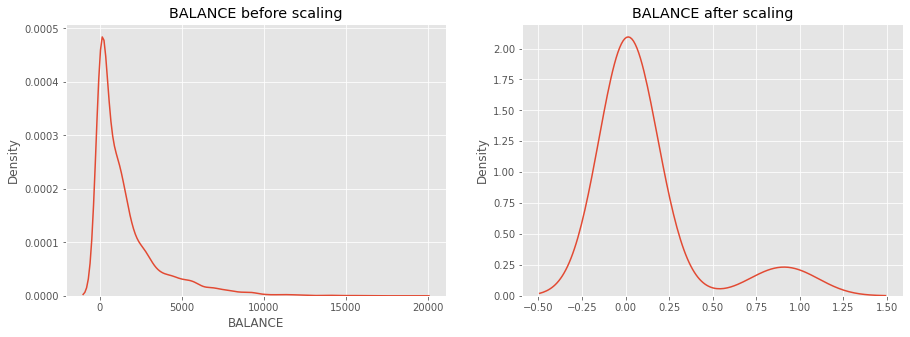

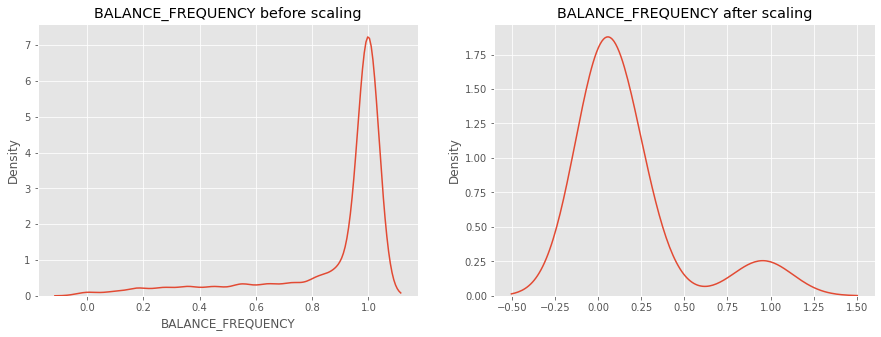

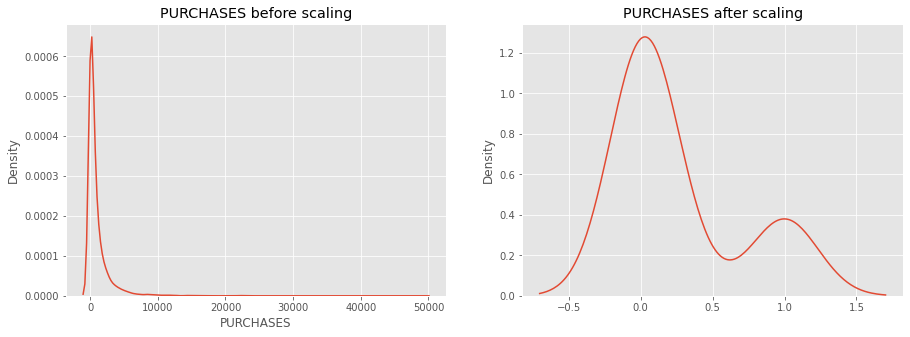

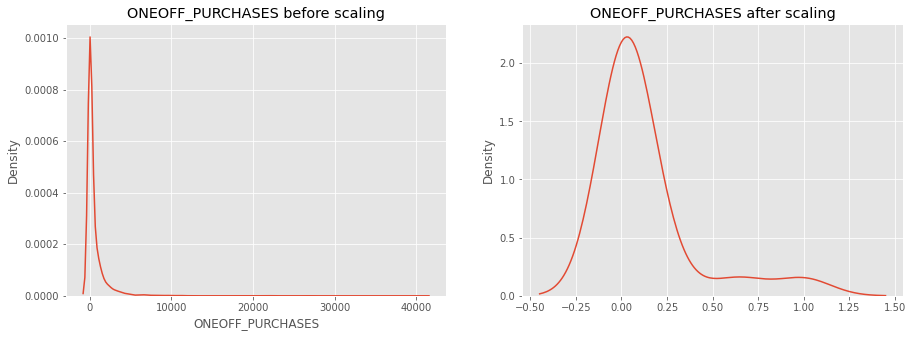

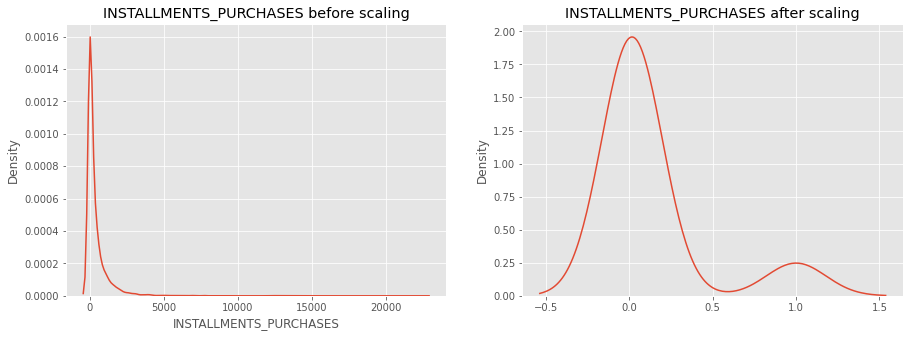

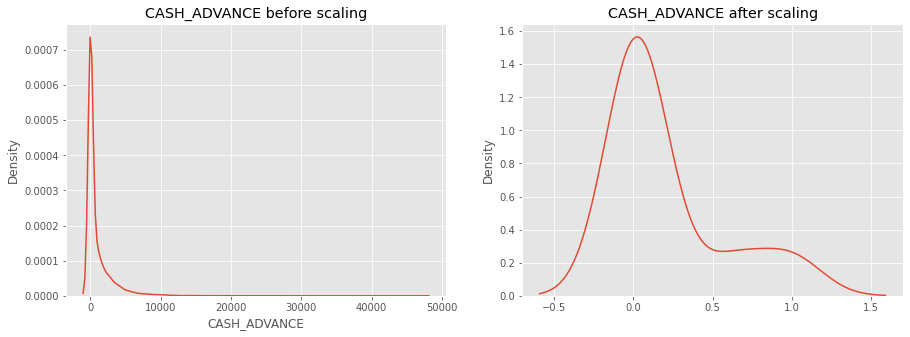

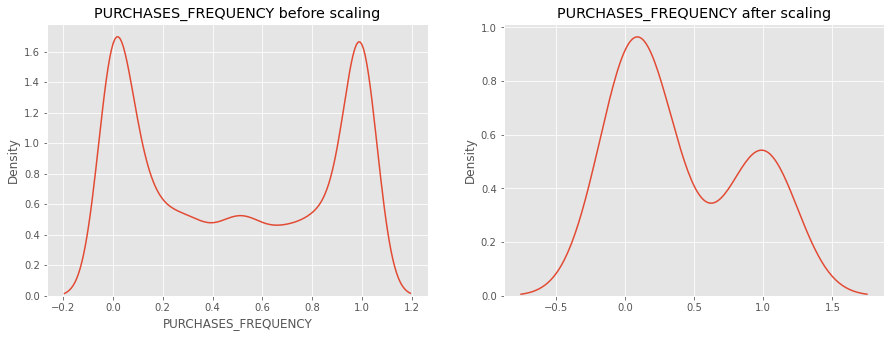

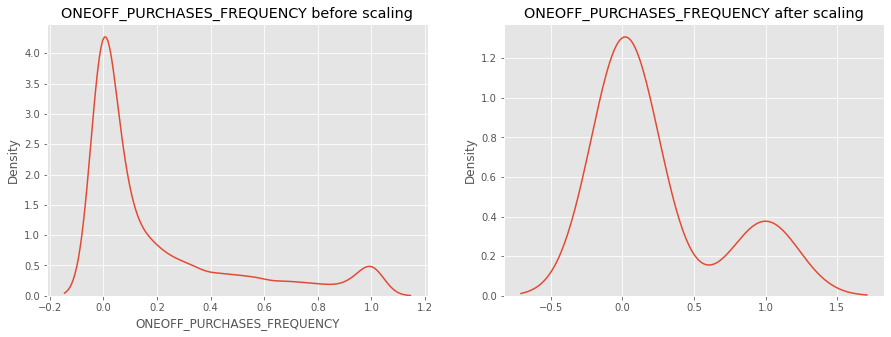

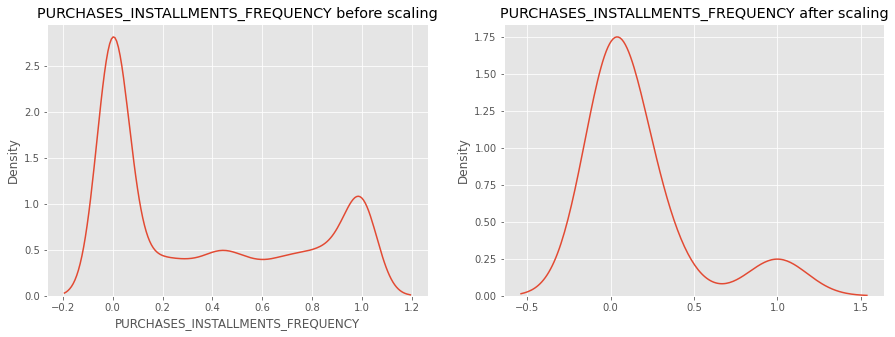

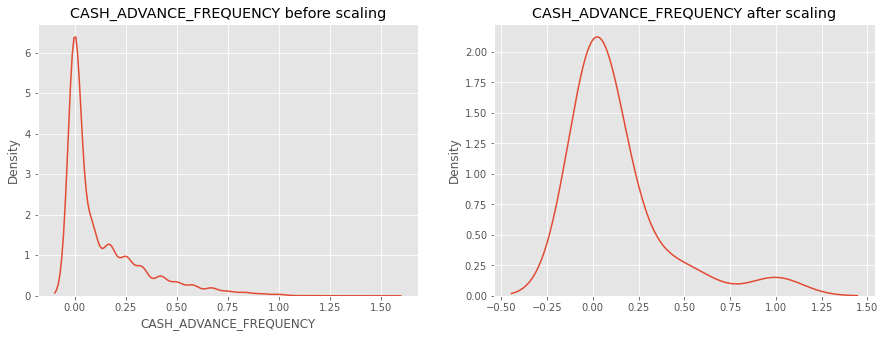

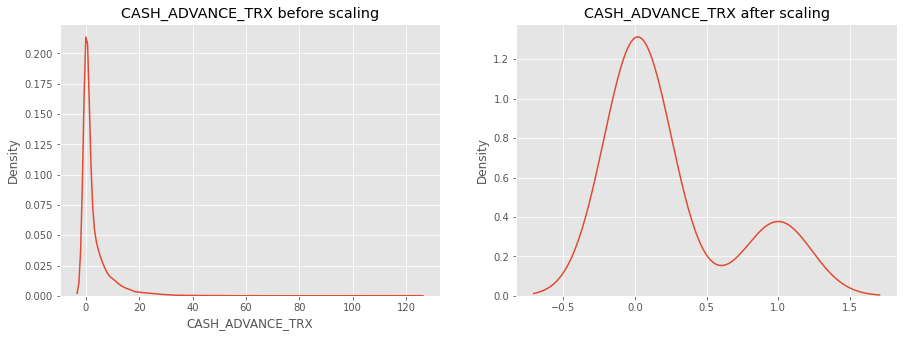

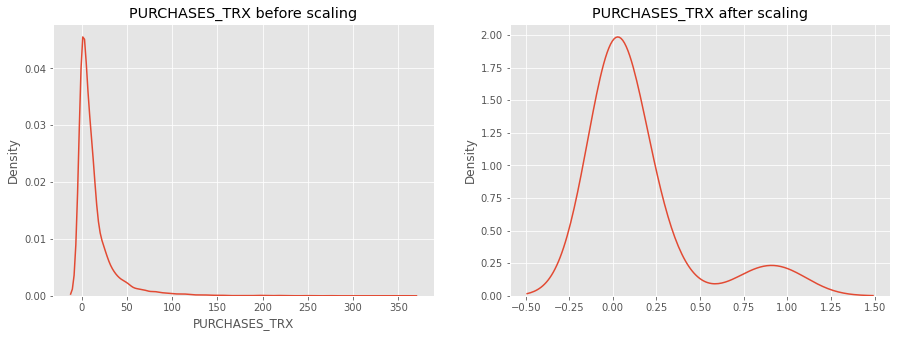

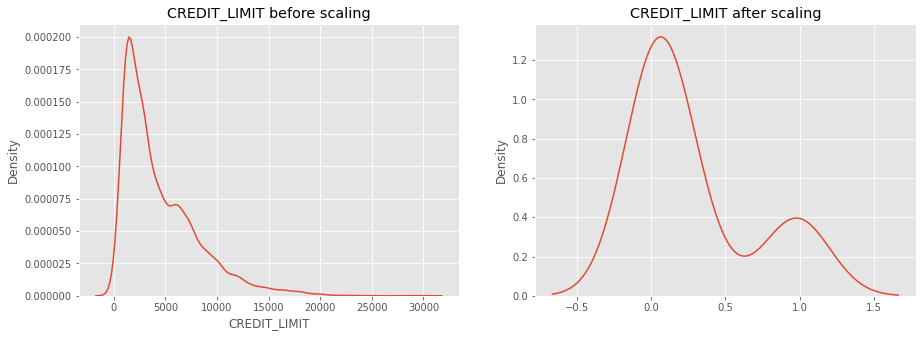

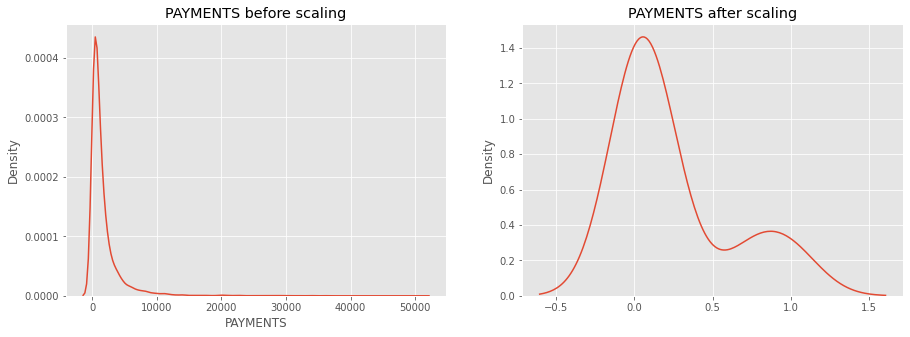

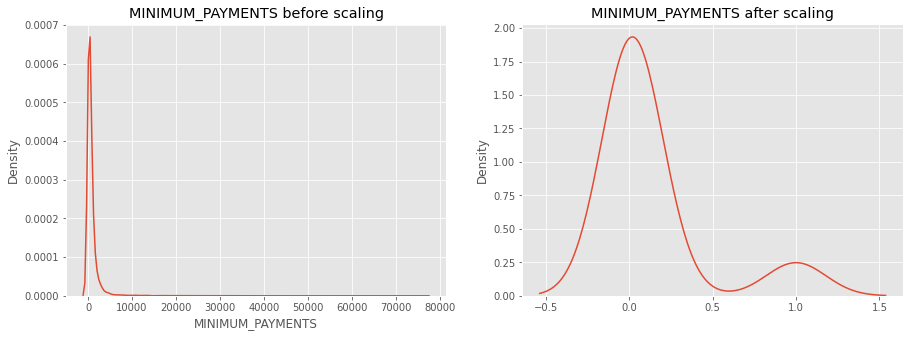

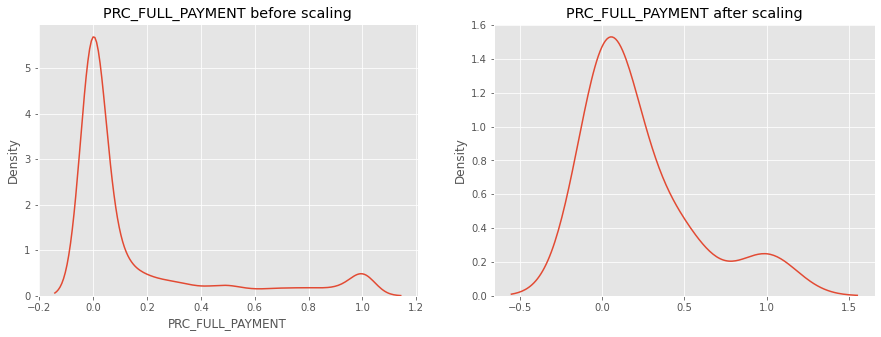

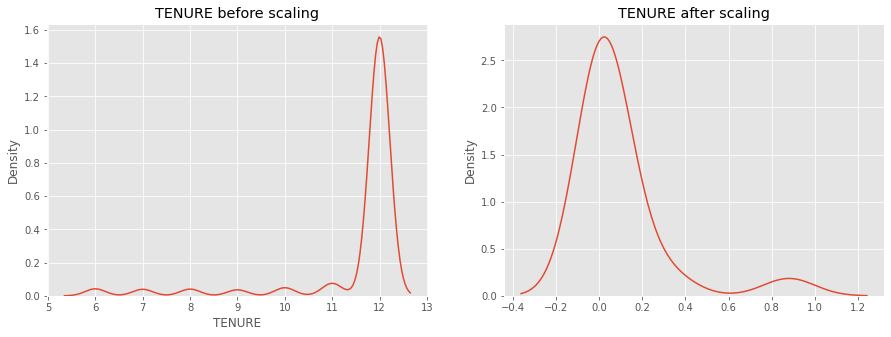

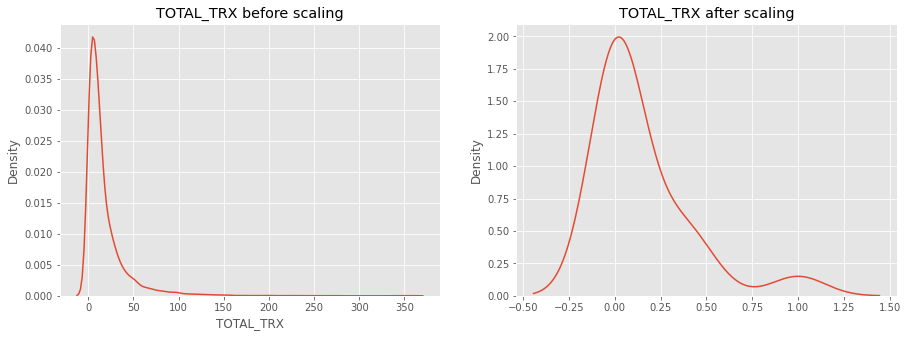

In [ ]:
plot(scaled_data2)

# Quantile Transormation Scaler

In [ ]:
scaler = QuantileTransformer()
scaled_data3 = scaler.fit_transform(df)
print(scaled_data3)


[[0.14174846 0.21421421 0.30655709 ... 0.         1.         0.12462462]
 [0.8507877  0.28278278 0.         ... 0.79079079 1.         0.23573574]
 [0.79296479 1.         0.6683165  ... 0.         1.         0.56306306]
 ...
 [0.09947207 0.23273273 0.346405   ... 0.8008008  0.         0.28378378]
 [0.06596242 0.23273273 0.         ... 0.8008008  0.         0.12462462]
 [0.36768456 0.16166166 0.74640493 ... 0.         0.         0.79429429]]


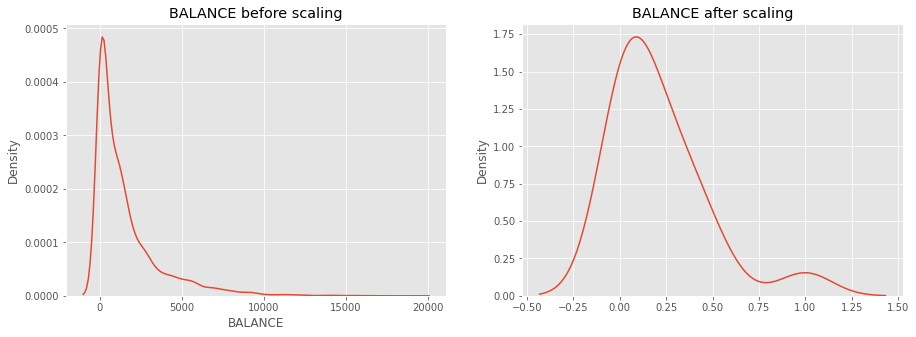

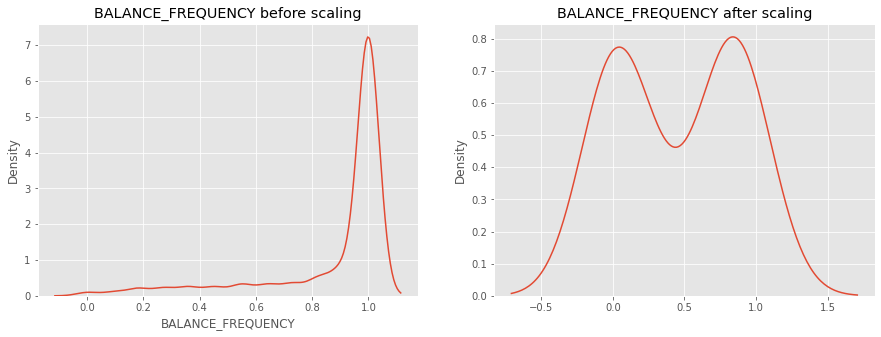

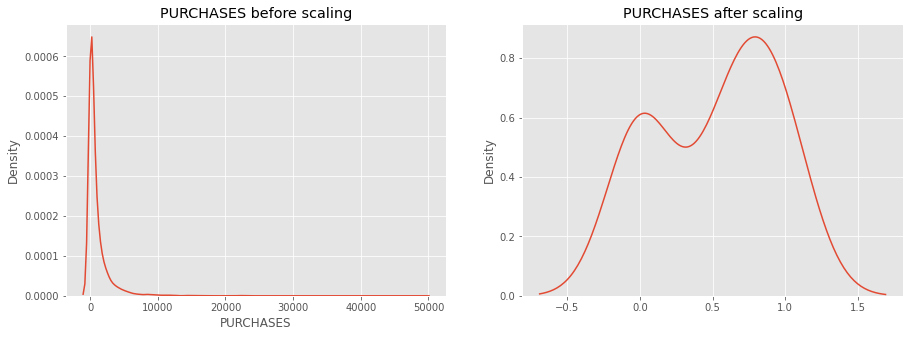

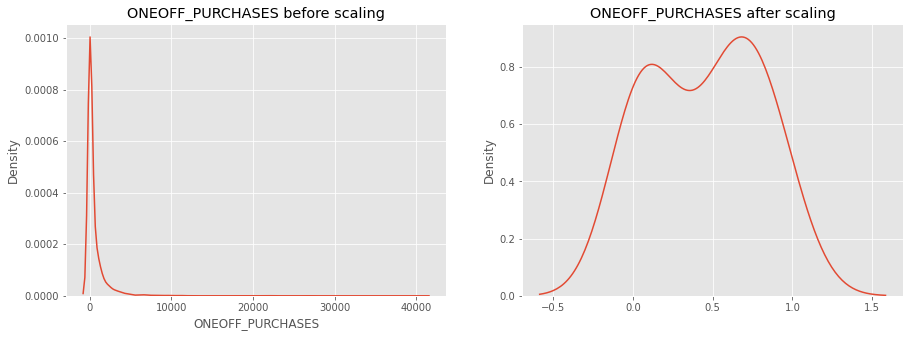

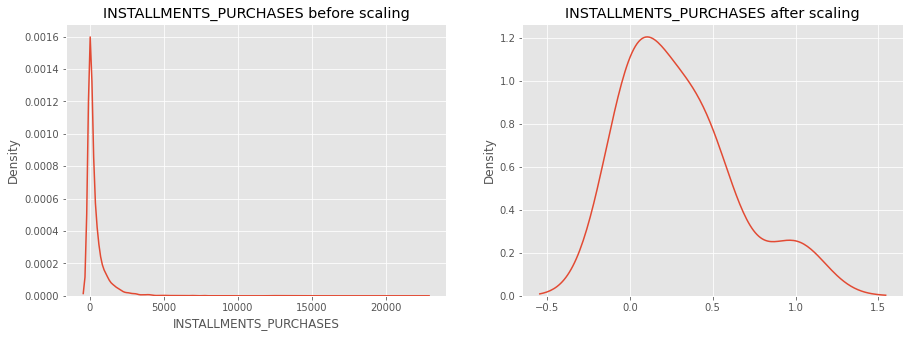

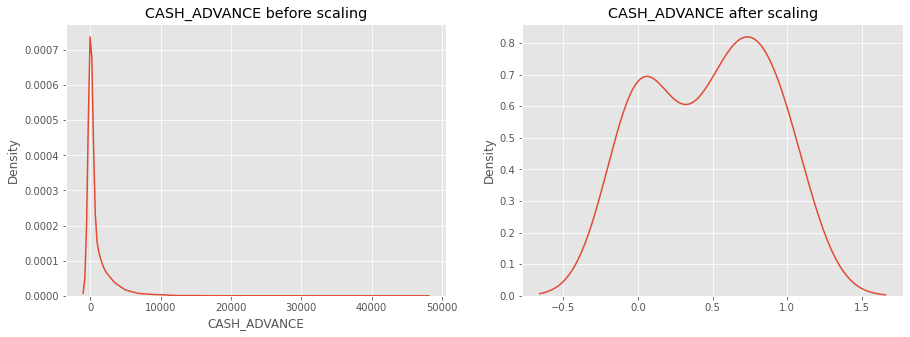

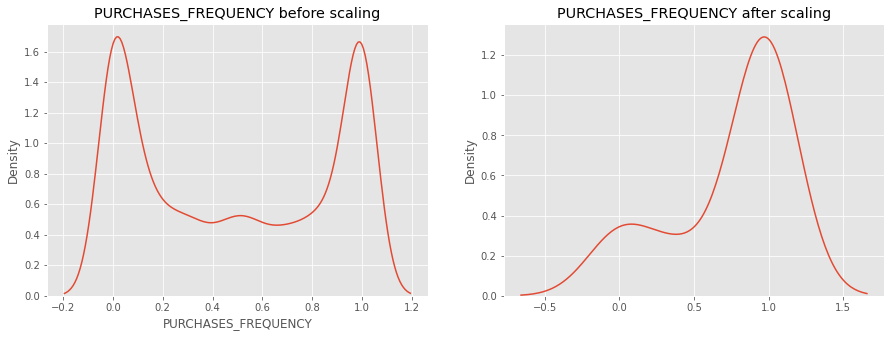

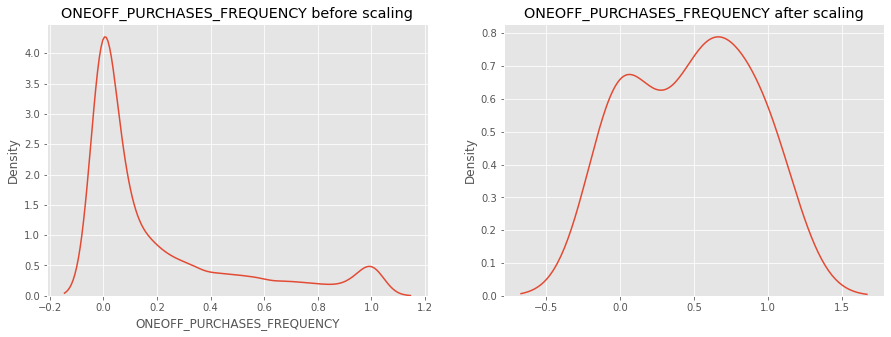

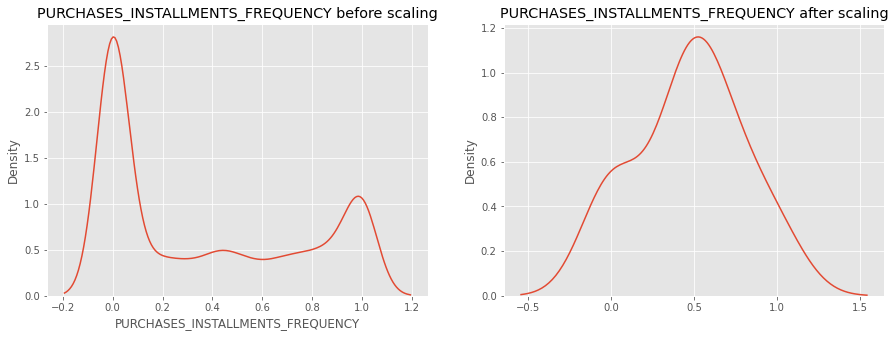

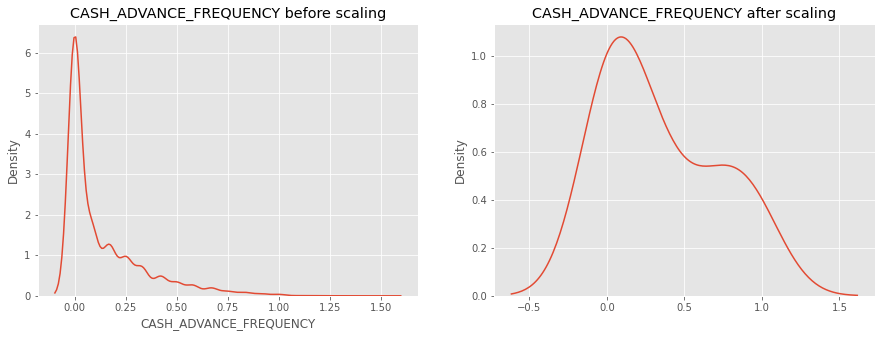

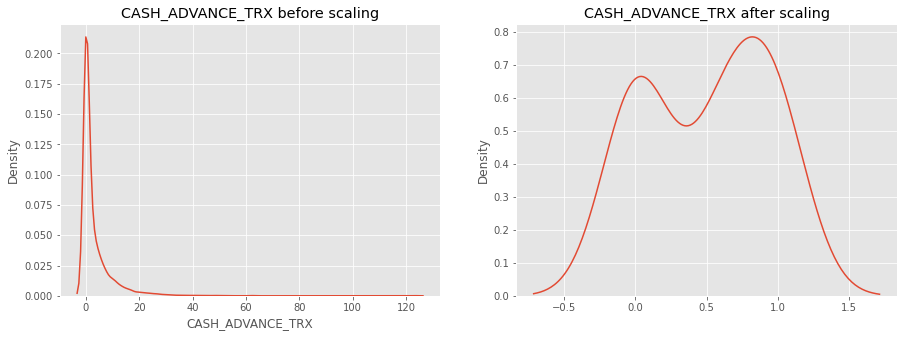

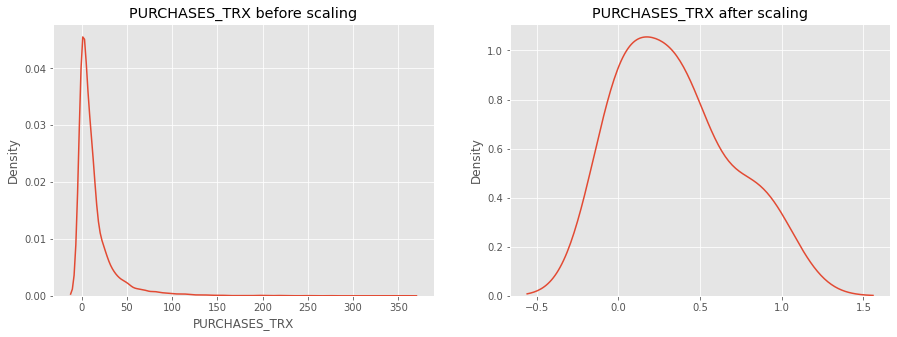

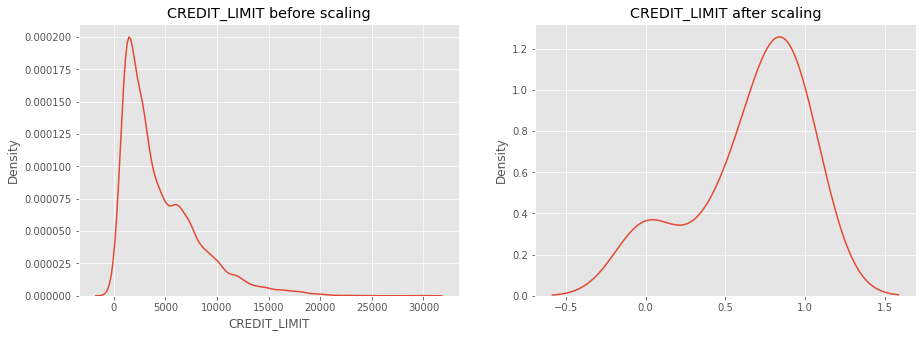

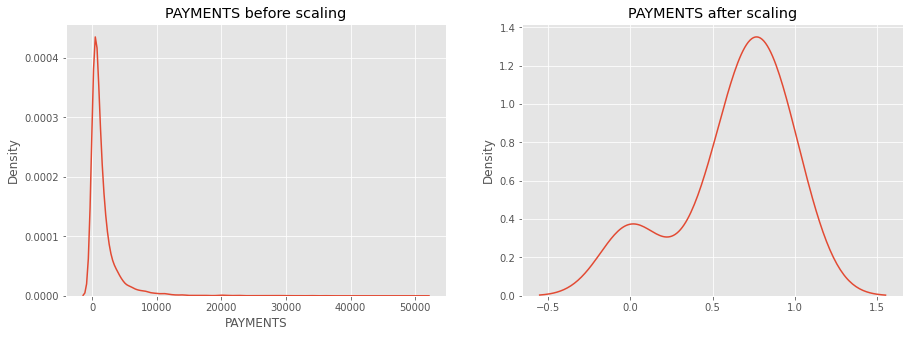

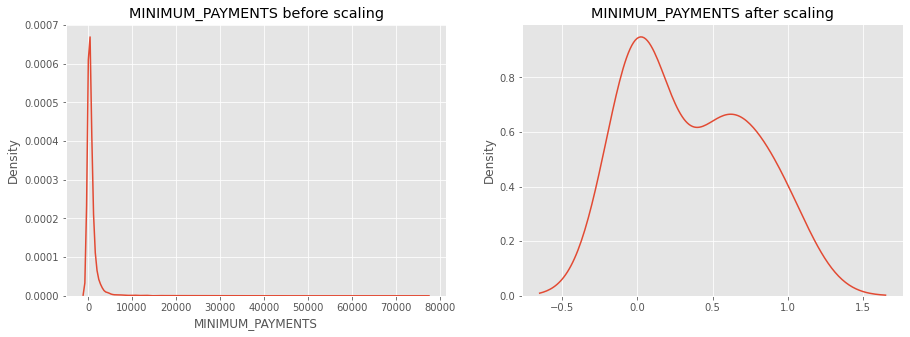

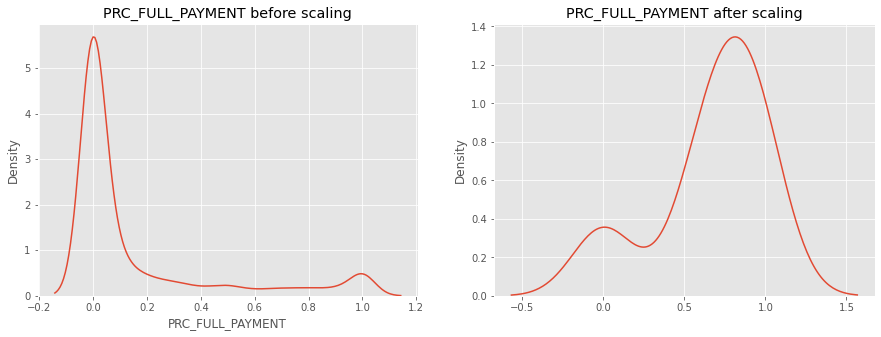

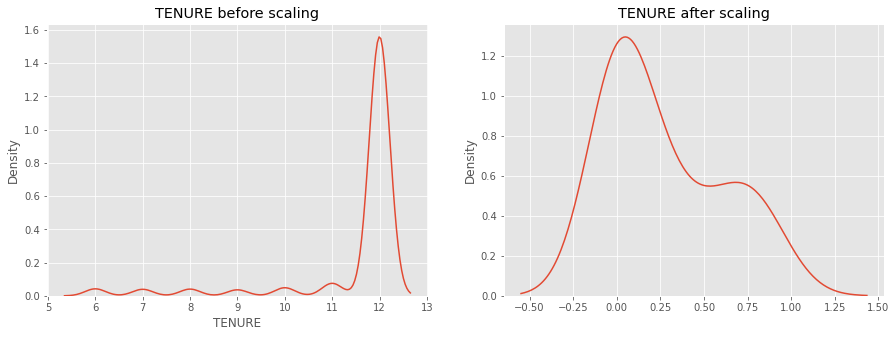

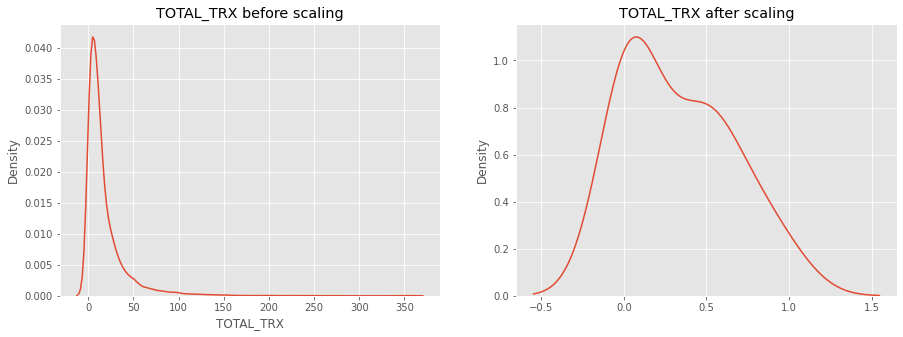

In [ ]:
plot(scaled_data3)

## K-Means Clustering

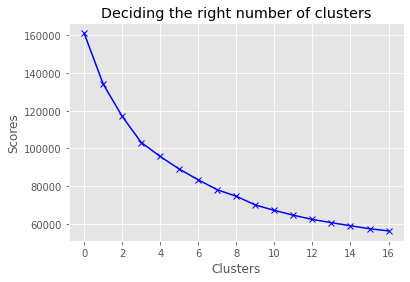

In [ ]:
##NOT NORMALIZED DATA
wcss = []

for i in range(1, 18):    
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_) 

plt.plot(wcss, 'bx-')
plt.title('Deciding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores') 
plt.show()

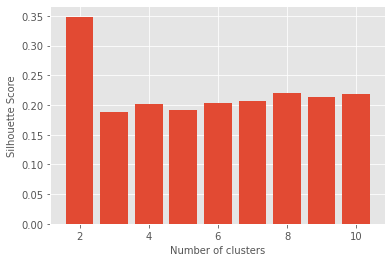

In [ ]:
silhouette_scores = []

for n_cluster in range(2, 11):
    silhouette_scores.append(silhouette_score(scaled_data, KMeans(n_clusters = n_cluster).fit_predict(scaled_data))) 

plt.bar(range(2, 11), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

# For n=2 clusters

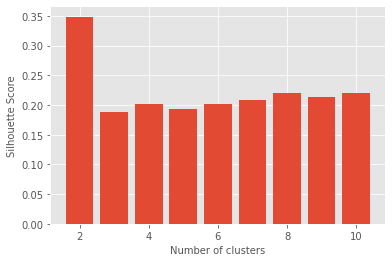

In [ ]:
silhouette_scores = []

for n_cluster in range(2, 11):
    silhouette_scores.append(silhouette_score(scaled_data, KMeans(n_clusters = n_cluster).fit_predict(scaled_data))) 

plt.bar(range(2, 11), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

In [ ]:
kmeans = KMeans(2)
kmeans.fit(scaled_data)
labels = kmeans.labels_

pca = PCA(n_components=2)
principal = pca.fit_transform(scaled_data)
principal

array([[-1.86498076, -0.94949478],
       [-1.12923171,  2.55470594],
       [ 0.76043966, -0.49605847],
       ...,
       [-1.14562446, -1.73546927],
       [-2.42702809, -0.45981014],
       [-0.38580378, -0.32121847]])

In [ ]:
pca_df = pd.DataFrame(data = principal, columns =['pca1','pca2'])
pca_df.head()

pca1      pca2
0 -1.864981 -0.949495
1 -1.129232  2.554706
2  0.760440 -0.496058
3 -1.080593  0.070461
4 -1.792020 -0.575688

In [ ]:
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

pca1      pca2  cluster
0 -1.864981 -0.949495        1
1 -1.129232  2.554706        1
2  0.760440 -0.496058        1
3 -1.080593  0.070461        1
4 -1.792020 -0.575688        1

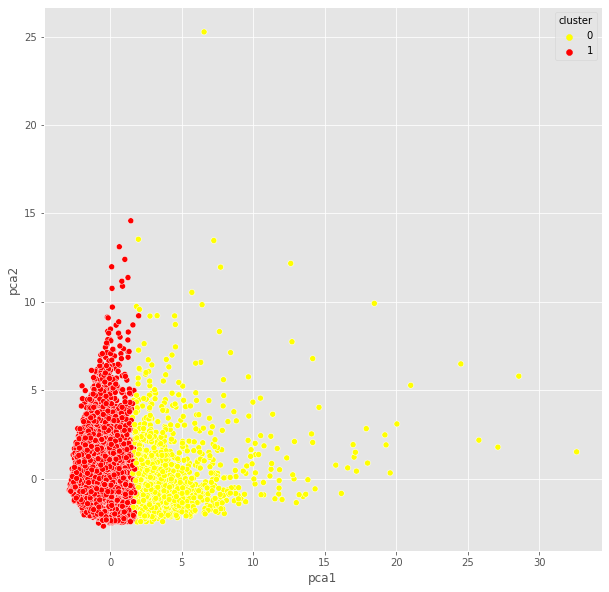

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['yellow','red'])
# ,'blue','pink','yellow','gray'
plt.show()

# For n=3 clusters

In [ ]:
kmeans = KMeans(3)
kmeans.fit(scaled_data)
labels = kmeans.labels_

pca = PCA(n_components=3)
principal = pca.fit_transform(scaled_data)
principal

array([[-1.86498102, -0.9494909 ,  0.44831347],
       [-1.12923794,  2.55466104,  0.68319328],
       [ 0.76044236, -0.496024  ,  0.26940023],
       ...,
       [-1.14562201, -1.7354463 , -0.64369979],
       [-2.42702593, -0.45979594,  0.72151825],
       [-0.38580279, -0.32122227,  0.69533407]])

In [ ]:
pca_df = pd.DataFrame(data = principal, columns =['pca1','pca2','pca3'])
pca_df.head()

pca1      pca2      pca3
0 -1.864981 -0.949491  0.448313
1 -1.129238  2.554661  0.683193
2  0.760442 -0.496024  0.269400
3 -1.080595  0.070444  1.540967
4 -1.792019 -0.575673  0.377821

In [ ]:
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

pca1      pca2      pca3  cluster
0 -1.864981 -0.949491  0.448313        0
1 -1.129238  2.554661  0.683193        0
2  0.760442 -0.496024  0.269400        1
3 -1.080595  0.070444  1.540967        0
4 -1.792019 -0.575673  0.377821        0

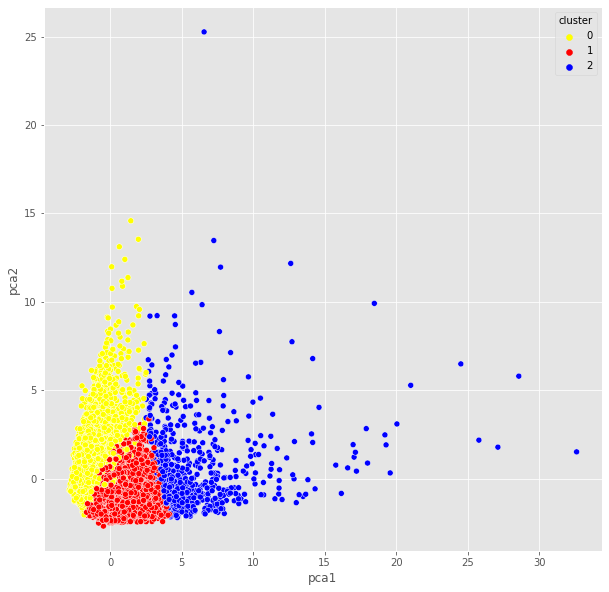

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['yellow','red','blue'])
# ,'blue','pink','yellow','gray'
plt.show()

# Clustering

## For n=3 

In [ ]:
#k=3
kmean= KMeans(3)
kmean.fit(X_principal)
labels=kmean.labels_
clusters=pd.concat([df, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.90               0.82      95.40              0.00   
1  3202.47               0.91       0.00              0.00   
2  2495.15               1.00     773.17            773.17   
3  1666.67               0.64    1499.00           1499.00   
4   817.71               1.00      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4          0.00                 0.17   
1                     0.0       6442.95                 0.00   
2                     0.0          0.00                 1.00   
3                     0.0        205.79                 0.08   
4                     0.0          0.00                 0.08   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                        0.00                              0.08   
1                        0.00                              0.00   
2                        1.00                              0.00   
3                        0.08                              0.00   
4                        0.08                              0.00   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                    0.00                 0              2        1000.0   
1                    0.25                 4              0        7000.0   
2                    0.00                 0             12        7500.0   
3                    0.08                 1              1        7500.0   
4                    0.00                 0              1        1200.0   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  TOTAL_TRX  cluster  
0    201.80            139.51              0.00      12          2        2  
1   4103.03           1072.34              0.22      12          4        1  
2    622.07            627.28              0.00      12         12        0  
3      0.00            864.21              0.00      12          2        2  
4    678.33            244.79              0.00      12          1        2

In [ ]:
clusters.shape

In [ ]:
clusters['cluster'].value_counts()

1    3731
2    3263
0    1956
Name: cluster, dtype: int64

In [ ]:
clusters.groupby('cluster').mean()

In [ ]:
finalDf = pd.concat([X_principal, pd.DataFrame({'cluster':labels})], axis = 1)
finalDf.head()

P1        P2  cluster
0 -0.539075 -0.628678        2
1 -0.495814  0.553640        1
2  0.327074  0.220723        0
3 -0.509246 -0.083781        2
4 -0.601358 -0.438864        2

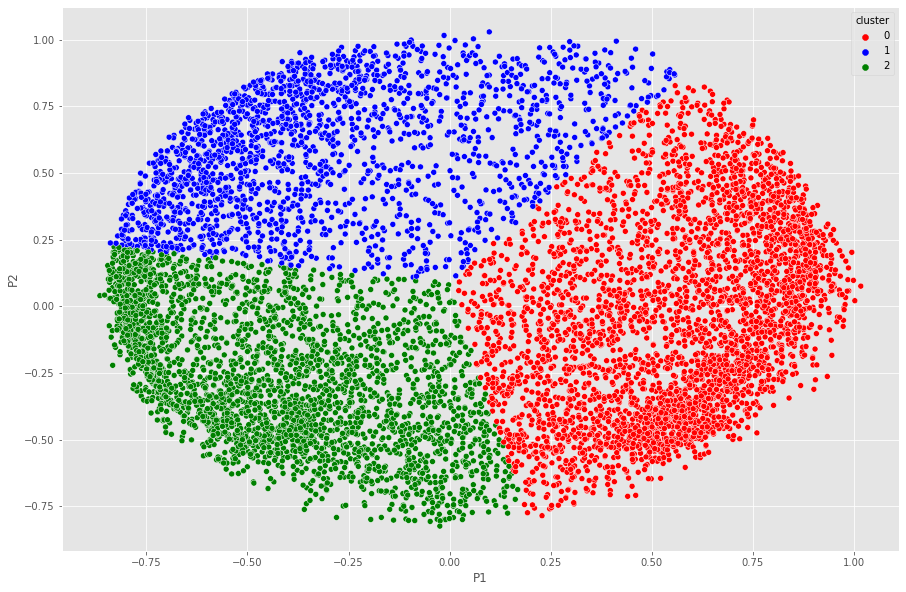

In [ ]:
plt.figure(figsize=(15,10))
ax = sns.scatterplot(x="P1", y="P2", hue="cluster", data=finalDf,palette=['red','blue','green'])
plt.show()

In [ ]:
#Variance
total_var = pca.explained_variance_ratio_.sum() * 100
total_var

57.34073935909986

## For n= 4 clusters

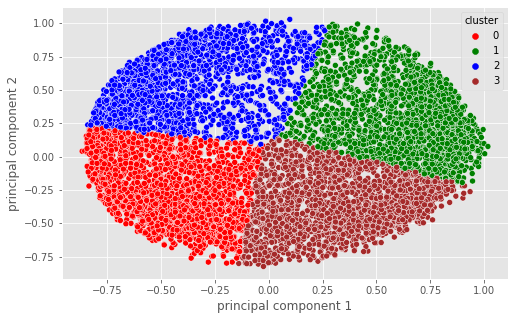

In [ ]:
# Kmeans algorithm
kmean= KMeans(n_clusters=4,init='k-means++',n_init=10)
kmean.fit(X_principal)
labels=kmean.labels_

# PCA to transform data to 2 dimensions for visualization
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(normalized_df)
principalDf = pd.DataFrame(data = principalComponents, columns=['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, pd.DataFrame({'cluster':labels})], axis = 1)

# scatterplot
plt.figure(figsize=(8,5))
ax = sns.scatterplot(x="principal component 1", y="principal component 2", hue="cluster", data=finalDf,palette=['red','green','blue','brown'])
plt.show()

## For n = 5 

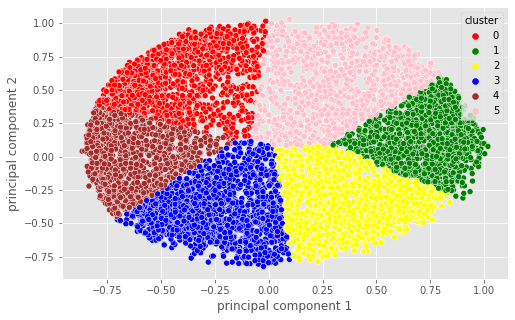

In [ ]:
# Kmeans algorithm
kmean= KMeans(n_clusters=6,init='k-means++',n_init=10)
kmean.fit(X_principal)
labels=kmean.labels_

# PCA to transform data to 2 dimensions for visualization
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(normalized_df)
principalDf = pd.DataFrame(data = principalComponents, columns=['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, pd.DataFrame({'cluster':labels})], axis = 1)

# scatterplot
plt.figure(figsize=(8,5))
ax = sns.scatterplot(x="principal component 1", y="principal component 2", hue="cluster", data=finalDf,palette=['red','green','yellow','blue','brown','pink'])
plt.show()

**K-MEANS**

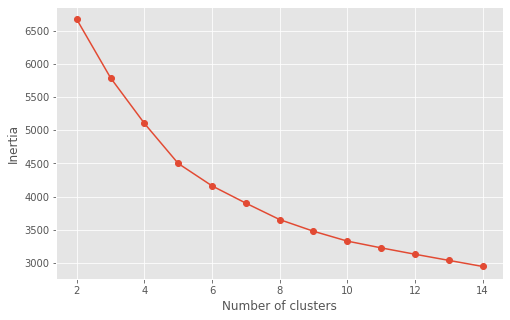

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
df_norm= normalized_df
scores = []
for k in range(2,15):
    km = KMeans(n_clusters=k,random_state=123)
    km = km.fit(df_norm)
    scores.append(km.inertia_)
dfk = pd.DataFrame({'Cluster':range(2,15), 'Score':scores})
plt.figure(figsize=(8,5))
plt.plot(dfk['Cluster'], dfk['Score'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()
     

In [ ]:
for i in range(5,11):
    kmeans_labels=KMeans(n_clusters=i,random_state=123).fit_predict(df_norm)
    print("Silhouette score for {} clusters k-means : {} ".format(i,metrics.silhouette_score(df_norm,kmeans_labels, metric='euclidean').round(3)))

Silhouette score for 5 clusters k-means : 0.229 
Silhouette score for 6 clusters k-means : 0.244 
Silhouette score for 7 clusters k-means : 0.24 
Silhouette score for 8 clusters k-means : 0.24 
Silhouette score for 9 clusters k-means : 0.219 
Silhouette score for 10 clusters k-means : 0.217 


In [ ]:
for i in [6,7,8]:
    kmeans_labels=KMeans(n_clusters=i,random_state=123).fit_predict(df_norm)
    print('Davies Bouldin Score:'+str(metrics.davies_bouldin_score(df_norm,kmeans_labels).round(3)))

Davies Bouldin Score:1.407
Davies Bouldin Score:1.447
Davies Bouldin Score:1.4


In [ ]:
kmeans_labels=KMeans(n_clusters=7,random_state=123).fit_predict(df_norm)

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.decomposition import PCA

In [ ]:

# StandardScaler performs the task of Standardization. Usually a dataset contains variables that are different in scale.
scaler=StandardScaler()
df_scl=scaler.fit_transform(df)

# Normalization refers to rescaling real valued numeric attributes into the range 0 and 1.
# It is useful to scale the input attributes for a model that relies on the magnitude of values, such as distance measures used in unsupervised learning.
norm=normalize(df_scl) 

# We can apply both (StandartScaler and Normalize) on our data before clustering. 
df_norm=pd.DataFrame(norm)

In [ ]:
results=pd.DataFrame(columns=['Eps','Min_Samples','Number of Cluster','Silhouette Score'])
for i in range(1,12):
  for j in range(1,12):
      dbscan_cluster = DBSCAN(eps=i*0.2, min_samples=j)
      clusters=dbscan_cluster.fit_predict(df_norm)
      if len(np.unique(clusters))>2:
          results=results.append({'Eps':i*0.2,
                        'Min_Samples':j,
                        'Number of Cluster':len(np.unique(clusters)),
                        'Silhouette Score':metrics.silhouette_score(df_norm,clusters),
                        'Davies Bouldin Score':metrics.davies_bouldin_score(df_norm,clusters)}, ignore_index=True)

In [ ]:
results.sort_values('Silhouette Score',ascending=False)[:5]

Eps  Min_Samples  Number of Cluster  Silhouette Score  \
17  0.4         11.0                4.0         -0.027650   
16  0.4          6.0                3.0         -0.034177   
19  0.6          2.0                5.0         -0.096079   
15  0.4          5.0                4.0         -0.126838   
14  0.4          4.0                8.0         -0.204362   

    Davies Bouldin Score  
17              3.426491  
16              4.473057  
19              3.208073  
15              3.740082  
14              2.558489

In [ ]:
dbscan_cluster = DBSCAN(eps=0.4, min_samples=4)
db_clusters=dbscan_cluster.fit_predict(df_norm)

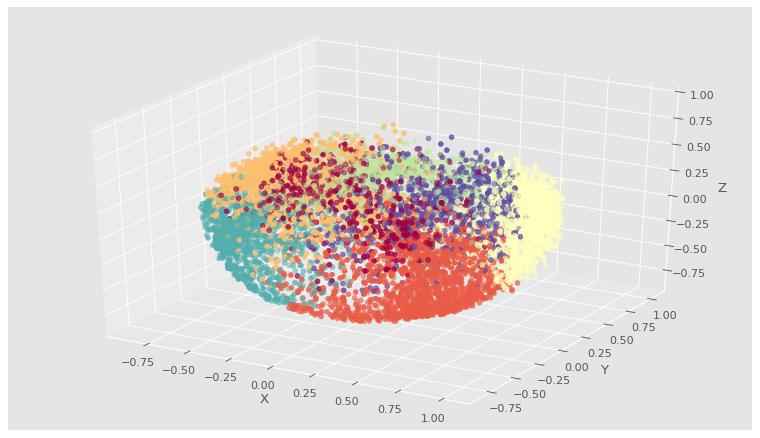

In [ ]:

pca = PCA(n_components=3).fit_transform(df_norm)
fig = plt.figure(figsize=(12, 7), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")
ax.scatter3D(pca.T[0],pca.T[1],pca.T[2],c=kmeans_labels,cmap='Spectral')

xLabel = ax.set_xlabel('X')
yLabel = ax.set_ylabel('Y')
zLabel = ax.set_zlabel('Z')